In [ ]:
# https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold

In [12]:
# Main
import numpy as np
import pandas as pd
import os

In [13]:
# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

In [14]:
# Data Preparation
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [46]:
# Adding the Data to the into the Working Repository:
current_path = os.getcwd()
data = pd.read_csv(r"C:\Users\ayesh\OneDrive\Desktop\PYTHON BUNDLE\Machine Learning\Supervised Learning\Project 1\credit_card.csv")
print("Number of Rows and Coulmns (Row, Col): ",data.shape)

Number of Rows and Coulmns (Row, Col):  (284807, 31)


In [17]:
# Displaying the first 5 Instances of the Data:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [18]:
# Generating the Detailed Summary Statistics for the Data:
data.describe()

# The Range of TimeStamp is from {0 to 172792 (Max)}
# The Amount Range from {0 to 25691.160000 (max)}
# The Fradulent Transactions are referred as Positive cases/label {Labeled as (1)}
# The Normal Transactions are Negative cases/label {Labeled as (0)}

# Also the 28 features(V1 to V28) are not Standardized (mean=(0) and Std=(1)) yet
# Standardization is to bring the data on the same Relative Scale (Good for ML)

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [19]:
# Checking the Data features Columns Name:
# There are 248,807 Instances and 31 columns as features (V1 to V28 -> Numerical) and Time, Amount, Class
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
# Checking the Total Number of Positive Label or Fradulent transactions:
# 1 for Fraud
# O for No_Fraud
data['Class'].sum()

492

## Dependent Variable:

0    284315
1       492
Name: Class, dtype: int64

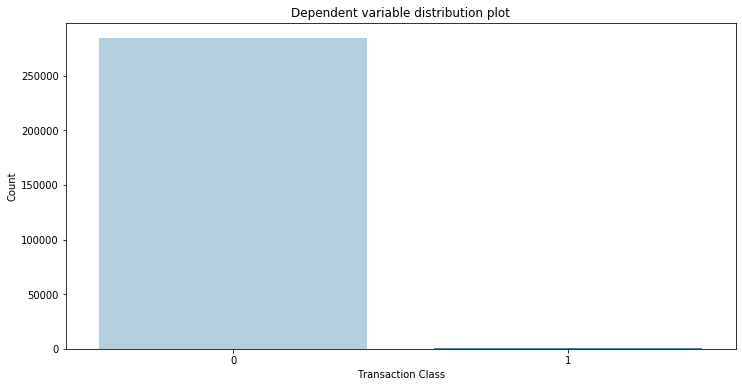

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data['Class'],palette='Blues')
plt.title('Dependent variable distribution plot')
plt.xlabel('Transaction Class')
plt.ylabel("Count")

data['Class'].value_counts()

# Target Variable is Unbalanced.

## Checking Missing Value in Data:

In [21]:
# In case of Missing value (NaNs), we can replace them with mean, median, mode of the Features or maybe some user defined values:

# In case of Categorical value we encodethe data such that all categorical values are represented with a Sparse Matrix:
# and then this Sparse Matrix is combined with Numerical Features.
#  The machine learning algorithm trains on this combined feature set

In [52]:
# To check NaNs:
nanCounter = np.isnan(data).sum()

# So there are no NaNs values are in the Data:

# Other Way to Check Null Value:
k = pd.DataFrame()
k['Null Value Count']  = data.isnull().sum()
k.T

Time  V1  V2  V3  V4  V5  V6  V7  V8  V9  ...  V21  V22  \
Null Value Count     0   0   0   0   0   0   0   0   0   0  ...    0    0   

                  V23  V24  V25  V26  V27  V28  Amount  Class  
Null Value Count    0    0    0    0    0    0       0      0  

[1 rows x 31 columns]

In [53]:
# If value are missing in data then we fill that missing cell with mode of the Data Column:

# def missing_value(df):
#     col = df.columns
#     for i in col:
#         if df[i].isnull().sum()>0:
#             df[i].fillna(df[i].mode()[0],inplace=True)

In [73]:
# Checking Unique Value in Data Frame:

# def uniq(df):
#     col = df.columns
#     k = pd.DataFrame(index=col)
#     for i in col:
#         k["Unique Values are: "] = df[i].nunique()
#         k['first Unique values'] = df[i].unique()[0]
#         k['Second Unique values'] = df[i].unique()[1]
#     print(k)
    
# uniq(data)

In [74]:
# Identifying the Distinct Values by features

# Lets look at timeStamp, we have 124,592 distinct timeStamps but we have total 284,807 observations,
# which mean we have multiple transection at the some timeStamp.

# 1 for Fraud
# O for No_Fraud

distinctCounter = data.apply(lambda x: len(x.unique()))
# distinctCounter

In [75]:
# Generate Feature Matrix and Labels Array:
# Creating and Standardizing feature Matrix {X} and isolate the Label array {Y} (1=fraud, 0=NO_fraud)
# Later on we will feed them into the Machine Learning Algorithms:

In [76]:
dataX = data.copy().drop(['Class'], axis= 1)
dataY = data['Class'].copy()

In [77]:
# Standardize the feature matrix X:
# Lets Rescale the feature matrix so that each feature, except time, has Mean=0 and STD=1:

featuresToScale = dataX.drop(['Time'], axis=1).columns  # It will return the labels of the columns on which {loc} will be applied.
scaler = pp.StandardScaler(copy=True)  # It is the standardization model to standardize data.
dataX.loc[:, featuresToScale] = scaler.fit_transform(dataX[featuresToScale])   # Get all rows and {V1..V28} one by one to
# Standardize the data by feature (Here feature are in Columns)

# The last Line is actually assigning the standardized data by checking and getting all the rows and columns using {loc} function which
# works on labels/Boolean.
dataX.loc[:, featuresToScale].head()
dataX.loc[:, featuresToScale].describe()
# We can see all that we have mean of zero and STD of ONE.

V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -8.157366e-16  3.154853e-17 -4.409878e-15 -6.734811e-16 -2.874435e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.879855e+01 -4.403529e+01 -3.187173e+01 -4.013919e+00 -8.240810e+01   
25%   -4.698918e-01 -3.624707e-01 -5.872142e-01 -5.993788e-01 -5.010686e-01   
50%    9.245351e-03  3.965683e-02  1.186124e-01 -1.401724e-02 -3.936682e-02   
75%    6.716939e-01  4.867202e-01  6.774569e-01  5.250082e-01  4.433465e-01   
max    1.253351e+00  1.335775e+01  6.187993e+00  1.191874e+01  2.521413e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.168992e-16 -8.767997e-16 -2.423604e-16  3.078727e-16  2.026926e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.963606e+01 -3.520940e+01 -6.130252e+01 -1.222802e+01 -2.258191e+01   
25%   -5.766822e-01 -4.478860e-01 -1.746805e-01 -5.853631e-01 -4.917360e-01   
50%   -2.058046e-01  3.241723e-02  1.871982e-02 -4.681169e-02 -8.533551e-02   
75%    2.991625e-01  4.611107e-01  2.740785e-01  5.435305e-01  4.168842e-01   
max    5.502015e+01  9.747824e+01  1.675153e+01  1.419494e+01  2.180758e+01   

       ...           V20           V21           V22           V23  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  2.754870e-16  1.685077e-17  1.478472e-15 -6.797197e-16   
std    ...  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min    ... -7.069146e+01 -4.741907e+01 -1.506565e+01 -7.175446e+01   
25%    ... -2.746334e-01 -3.109433e-01 -7.473476e-01 -2.591784e-01   
50%    ... -8.104705e-02 -4.009429e-02  9.345377e-03 -1.792420e-02   
75%    ...  1.725733e-01  2.537392e-01  7.283360e-01  2.364319e-01   
max    ...  5.113464e+01  3.703471e+01  1.447304e+01  3.607668e+01   

                V24           V25           V26           V27           V28  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.234659e-16 -7.659279e-16  3.247603e-16 -2.953495e-18  5.401572e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -4.683638e+00 -1.975033e+01 -5.401098e+00 -5.590660e+01 -4.674612e+01   
25%   -5.854676e-01 -6.084001e-01 -6.780717e-01 -1.755053e-01 -1.604440e-01   
50%    6.765678e-02  3.183240e-02 -1.081217e-01  3.325174e-03  3.406368e-02   
75%    7.257153e-01  6.728006e-01  4.996663e-01  2.255648e-01  2.371526e-01   
max    7.569684e+00  1.442532e+01  7.293975e+00  7.831940e+01  1.025434e+02   

             Amount  
count  2.848070e+05  
mean   3.202236e-16  
std    1.000002e+00  
min   -3.532294e-01  
25%   -3.308401e-01  
50%   -2.652715e-01  
75%   -4.471707e-02  
max    1.023622e+02  

[8 rows x 29 columns]

## Feature Engineering and Feature Selection:

In [78]:
#  Feature engineering involves creating new features—for example, calculating ratios or counts or sums from
#  the Original features to help the Ml algo extract a stronger Signal from the DataSet.

In [79]:
# Feature selection involves selecting a subset of the features for training, effectively removing some of the
# less relevant features from consideration. This may help prevent the machine learning algorithm from overfitting to
# the noise in the dataset.

In [80]:
# Here we cannot perform any feature Engineering because our data is already been reduced by PCA and we do not know
# that what any of the feature represent:

# Also we canot perform feature Selection because No# of observation have already outnumbered the number of features
# which dramatically reduce the chances of overfitting. We do not have redundant feature because we have already performed
# the PCA of our data.

In [91]:
# Checking the Correlation of features:

correlationMatrix = pd.DataFrame(data=[], index = dataX.columns, columns= dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i], dataX.loc[:,j])[0],2)
correlationMatrix
# print(correlationMatrix.isnull().sum())

# plt.figure(figsize=(10,4))
# sns.heatmap(correlationMatrix,annot=True)
# plt.tight_layout()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


## Data Visualization:

0    284315
1       492
Name: Class, dtype: int64

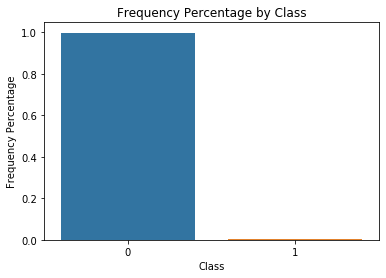

In [31]:
# This helps us to Visualize the data set to check either data is balance or not.

count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))  # Here len(data) is same as Sum_of_freq_of_class(0,1)
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')
count_classes

## Model Preparation

In [32]:
# Now Data is ready, lets prepare for Model:

In [33]:
# Split into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(dataX,
 dataY, test_size=0.33,
 random_state=2018, stratify=dataY)

In [34]:
# Selecting Cost Function (error rate) to pass into ML algo to Min this cost function:
# Since this is Supervised classification problem--with two classes-- lets use {Binary classification log loss}
# which will calculate the cross entropy beyween the true labels and the model based predictions:

In [35]:
# Create k-Fold Cross-Validation Sets:
''' To help the machine learning algorithm estimate what its performance will
be on the never-before-seen examples (the test set), it is best practice to
further split the training set into a training set and a validation set.'''

'''For example, if we split the training set into fifths, we can train on four-fifths of the original training set
and evalulate the newly training model by making predictions on the fifth slice of the original training set,
known as the validation set.'''

'''It is possible to train and evaluate like this five times, leaving aside a
different fifth slice as the validation set each time. This is known as k-fold
cross-validation, where k in this case is five. With this approach, we will
have not one estimate but five estimates for the generalization error.'''

'''We will store the training score and the cross-validation score for each of
the five runs, and we will store the cross-validation predictions each time.
After all five runs are complete, we will have cross-validation predictions
for the entire dataset. This will be the best all-in estimate of the
performance the test set.
'''

'We will store the training score and the cross-validation score for each of\nthe five runs, and we will store the cross-validation predictions each time.\nAfter all five runs are complete, we will have cross-validation predictions\nfor the entire dataset. This will be the best all-in estimate of the\nperformance the test set.\n'

In [36]:
# Here’s how to set up for the k-fold validation, where k is five:
# So our data split up into five segments and any 4 out of 5 are used as training and last 1 is used for cross validation testing.

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)
k_fold.get_n_splits(X_train,y_train)
# Now we are ready for the ML model:
# The performance on these neverbefore-seen cases is known as the generalization error.

5

## Machine Learning Models (Part I):

#### Model #1: Logistic Regression:

In [37]:
# Set Hyperparameters:
# To improve Hyperparameters we use {Grid Search and Random Search}

penalty = 'l2'
""" l2 is less sensitive to the outlier and will assign nonzero weight to nearly all the feature whereas"""
""" l1 will assign high weights to important features and nonzero to rest on them. As the weights vary feature to fearue
    l1 is not as stable to change in data points as the l2 solution"""

C = 1.0    #Refularization Strength (Smaller value-> Larger regularization)
class_weight = 'balanced' # To Signal imbalance Problem (Higher weight to rare labels and vice versa)
random_state = 2018
solver = 'liblinear'

# This problem is Classification problem with two classes, so we use {Binary Classification log loss} which will
# calculate the cross-entropy between the true_label and the model-based predicted.


# Logistic Regression Model:
logReg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, random_state=random_state, solver=solver)

# Greater the value of Regularizarion, greater the strength of complexity, which means it will overfit the data.
# Regularizarion Pushes the ML algo to prefer Simpler Model over the Complex Model. It helps addresses the overfitting
# by penalizing Complexity.

In [38]:
# In below code {after For Loop} [X_train_fold.shape (or X_train_split)] = 152656    which is {4/5 of Total Training data}
#                                [X_cv_fold.shape (or X_cv_split)] = 38164   which is {1/5 of Total Training data}

# X_train_fold = X_train.iloc[train_index,:]  means look at value in X_train at index number given in train_index array.
# And this will return rows depending on train_index will all the columns in X_train. Same for the rest

In [39]:
trainingScores = []
cvScores = []
predictionBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=[0,1])

# logReg is being called as model
model = logReg
count = 1

# Here we are only looking at {Training Data}:
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),y_train.ravel()):
    
    print('No. {} fold of {} kFold!!!'.format(count,k_fold.n_splits))
    
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    # fitting the model:
    model.fit(X_train_fold, y_train_fold)
    
    # logloss (Error or cost) function for Training Data (4/5):
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    # logloss (Error or cost) function for Cross-Validation Data (1/5):
    predictionBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    count += 1
    print('\n')
    
loglossLogisticRegression = log_loss(y_train, predictionBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)


No. 1 fold of 5 kFold!!!
Training Log Loss:  0.10315548787866907
CV Log Loss:  0.10899252380163221


No. 2 fold of 5 kFold!!!
Training Log Loss:  0.10808654441515525
CV Log Loss:  0.10349837191186405


No. 3 fold of 5 kFold!!!
Training Log Loss:  0.0933784061193705
CV Log Loss:  0.095037274492573


No. 4 fold of 5 kFold!!!
Training Log Loss:  0.11767834229565328
CV Log Loss:  0.11834428976610788


No. 5 fold of 5 kFold!!!
Training Log Loss:  0.12369331549997062
CV Log Loss:  0.12197630594447521


Logistic Regression Log Loss:  0.10956975318333047


In [94]:
print('Confusion matrix\n', confusion_matrix(y_cv_fold, model.predict(X_cv_fold)))
print(model.score(X_cv_fold,y_cv_fold))
print('Cv', cvScores ,'\nMean cv Score',np.mean(cvScores))
print(model.coef_)

Confusion matrix
 [[37061  1037]
 [    2    64]]
0.9727753904202914
Cv [0.10899252380163221, 0.10349837191186405, 0.095037274492573, 0.11834428976610788, 0.12197630594447521] 
Mean cv Score 0.10956975318333047
[[-9.75026921e-06  1.24925999e+00  9.01899836e-01  3.89930092e-01
   1.06208321e+00  1.07148555e+00 -7.30812945e-01 -6.15634256e-01
  -4.44905157e-01 -4.04612273e-01 -7.99447869e-01  3.94721476e-01
  -9.71003625e-01 -1.83593719e-01 -1.31006855e+00 -2.13943654e-01
  -5.19529744e-01 -6.31313458e-01 -2.70078189e-01  2.22801677e-01
  -6.42096071e-01 -1.48135357e-01  6.91361020e-01  2.26364132e-01
   2.90143649e-02  5.09289129e-02 -7.41530889e-02 -1.32866108e-02
   2.90124370e-01  1.83521803e+00]]


In [202]:
'''
Why to use Log-loss?
If we look at the log-loss function we can see that model will generate the Fraud probability for each credit card
transaction. Closer the probabilities are to true labels (1=fraud and 0=No_fraud), lower the log-loss function.
This is what Machine learning algorithm tries to minimize.
'''
'''
Generally (but not always) the training log
loss will be lower than the cross-validation log loss. Because the machine
learning algorithm has learned directly from the training data, its
performance (i.e., log loss) should be better on the training set than on the
cross-validation set.
'''
'''
The machine learning model outputs a prediction probability for each transaction, where
one is fraud and zero is not fraud. The closer the probability is to one, the more likely
the transaction is fraudulent; the closer the probability is to zero, the more likely the
transaction is normal. By comparing the model’s probabilities with the true labels, we
can assess the goodness of the model.
'''

'\nThe machine learning model outputs a prediction probability for each transaction, where\none is fraud and zero is not fraud. The closer the probability is to one, the more likely\nthe transaction is fraudulent; the closer the probability is to zero, the more likely the\ntransaction is normal. By comparing the model’s probabilities with the true labels, we\ncan assess the goodness of the model.\n'

In [ ]:
'''
For each of the five runs, their training and cross-validation log losses are
similar. The logistic regression model does not exhibit severe overfitting; if
it did, we would have a low training log loss and comparably high crossvalidation
log loss.
'''

## Evaluation Matrix:

### Recall-Precision:

In [ ]:
# To intuitively understand the result, we use recall-precision technique:

# Of the fraudulent transactions in the training set, how many did we catch is called Recall. Recall is the
# number of true positives over the number of total actual positives in the dataset.

# The transactions that were flagged as fraudulent by the logistic regression model, how many were
# truly fraudulent is called Precision. Precision is the number of true
# positives over the number of total positive predictions.

# In nearly balanced class problem we use Confusion Matrix to evaluate results.

# A solution with high recall but low precision returns many results, capturing many of the positives, but with
# many false alarms... A solution with high precision but low recall is the exact opposite; it returns few results.But
# most of its predictions are correct.

In [ ]:
# if our solution had high precision but low recall, there would be a very small number of fraudulent transactions
# found but most would be truly fraudulent.

# if the solution had low precision but high recall it would flag many of the transactions as fraudulent, thus catching
# a lot of the fraud, but most of the flagged transactions would not be fraudulent.

# An optimal solution needs to have high precision and high recall, rejecting only those transactions that are truly
# fraudulent (i.e., high precision) and catching most of the fraudulent cases in the dataset (high recall).

In [ ]:
# As the threshold moves lower (i.e., becomes less strict), the model will reject more transactions, catching more
# of the fraudulent cases but also unnecessarily rejecting more of the normal cases as well.

'''
Graph of the trade-off between precision and recall is known as the precision-recall curve.
'''

# To evaluate the precision-recall curve, we can calculate the average precision, which is the weighted mean of the
# precision achieved at each threshold. The higher the average precision, the better the solution.

### Receiver Operating Characteristic:

In [203]:
# The receiver operating characteristic (ROC) curve plots the true positive rate on the Y axis and the false positive
# rate on the X axis.

'''
The true positive rate can also be referred to as the sensitivity, and the false positive rate can also be referred
to as the 1-specificity. The closer the curve is to the top-left corner of the plot, the better the solution—with a
value of (0.0, 1.0) as the absolute optimal point, signifying a 0% false positive rate and a 100% true positive rate.

To evaluate the solution, we can compute the area under this curve. The larger the auROC, the better the solution.
'''

'\nThe true positive rate can also be referred to as the sensitivity, and the false positive rate can also be referred\nto as the 1-specificity. The closer the curve is to the top-left corner of the plot, the better the solution—with a\nvalue of (0.0, 1.0) as the absolute optimal point, signifying a 0% false positive rate and a 100% true positive rate.\n\nTo evaluate the solution, we can compute the area under this curve. The larger the auROC, the better the solution.\n'

# Evaluating the logistic regression model

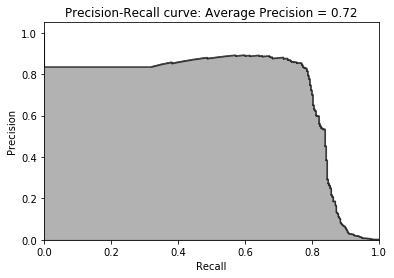

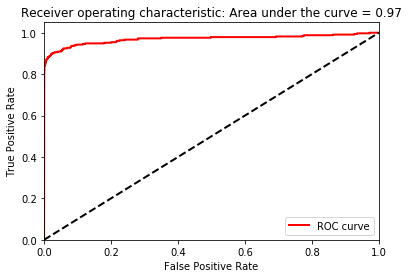

In [231]:
# Let’s plot the precision-recall curve and calculate the average precision:

preds = pd.concat([y_train,predictionBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
preds['prediction'])
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
average_precision))

'''
Putting together what we discussed earlier, you can see that we can achieve approximately 80% recall (i.e., catch 80%
of the fraudulent transactions) with approximately 70% precision (i.e., of the transactions the model flags as
fraudulent, 70% are truly fraudulent while the remaining 30% were incorrectly flagged as fraudulent).
'''

# Let’s measure the auROC:

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Model #2: Random Forests

In [219]:
# Set the hyperparameters:

n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'
RFC = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth,
                             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                             min_weight_fraction_leaf=min_weight_fraction_leaf,max_leaf_nodes=max_leaf_nodes,
                             bootstrap=bootstrap, oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,class_weight=class_weight)

In [224]:
# Train the model:

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=[0,1])
model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.00038666468324144877
CV Log Loss:  0.0153965105968685
Training Log Loss:  0.0004263217817373472
CV Log Loss:  0.010755953739346607
Training Log Loss:  0.0004088335711949752
CV Log Loss:  0.015386056391658222
Training Log Loss:  0.000430335389253032
CV Log Loss:  0.0047639585692903445
Training Log Loss:  0.00045596089565145143
CV Log Loss:  0.005619921221138471
Random Forests Log Loss:  0.010384480103660427


In [225]:
# Notice that the training log losses are considerably lower than the crossvalidation log losses, suggesting that
# the random forests classifier—with the mostly default hyperparameters—overfits the data during the training somewhat.

'''
Even though it overfits the training data somewhat, the random forests has a validation log loss that is about
one-tenth that of the logistic regression, significant improvement over the previous machine learning solution.
The random forests model is better at correctly flagging the fraud among credit card transactions.
'''

'\nEven though it overfits the training data somewhat, the random forests has a validation log loss that is about\none-tenth that of the logistic regression, significant improvement over the previous machine learning solution.\nThe random forests model is better at correctly flagging the fraud among credit card transactions.\n'

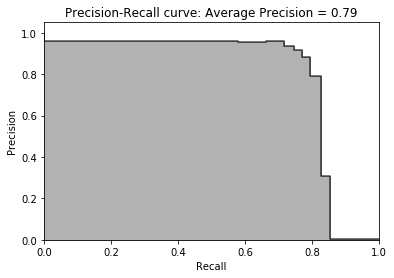

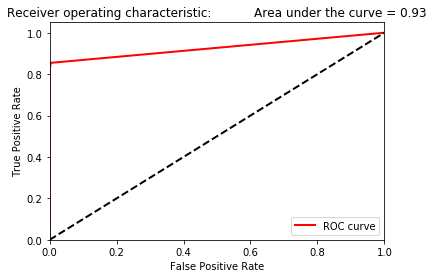

In [230]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''
As you can see from the curve, the model can catch approximately 80% of all the fraud with approximately 80%
precision. This is more impressive than the approximately 80% of all the fraud the logistic regression model
caught with 70% precision.
'''

'''
The average precision of 0.79 of the random forests model is a clear improvement over the 0.73 average precision
of the logistic regression model. However, the auROC, shown in Figure 2-7, is somewhat worse— 0.93 for random forests
versus 0.97 for logistic regression.
'''

# Model #3: Gradient Boosting Machine (XGBoost)

In [241]:
# Set the hyperparameters:

params_xGB = {
'nthread':16, #number of cores
'learning rate': 0.3, #range 0 to 1, default 0.3
'gamma': 0, #range 0 to infinity, default 0
# increase to reduce complexity (increase bias, reduce variance)
'max_depth': 6, #range 1 to infinity, default 6
'min_child_weight': 1, #range 0 to infinity, default 1
'max_delta_step': 0, #range 0 to infinity, default 0
'subsample': 1.0, #range 0 to 1, default 1
# subsample ratio of the training examples
'colsample_bytree': 1.0, #range 0 to 1, default 1
# subsample ratio of features
'objective':'binary:logistic',
'num_class':1,
'eval_metric':'logloss',
'seed':2018,
'silent':1
}

In [ ]:
# Train the model:

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
index=y_train.index,columns=
['prediction'])
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000,
    nfold=5, early_stopping_rounds=200, verbose_eval=50)
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
    
loglossXGBoostGradientBoosting =log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

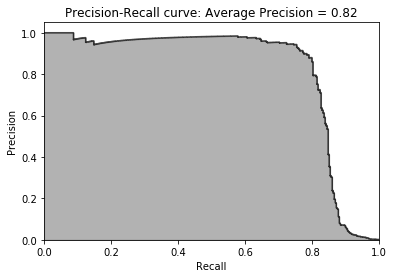

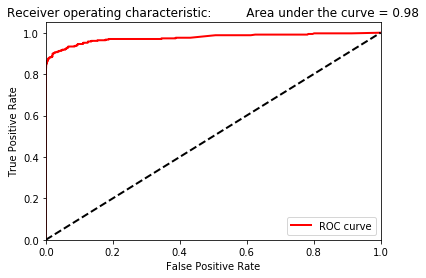

In [242]:

preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Model #4: Gradient Boosting Machine (LightGBM)

In [243]:
# Set the hyperparameters:

# We will set this up as a binary classification problem and use log loss as the cost function. We will set the max
# depth of each tree to 4 and use a learning rate of 0.1. For each tree, we will use all the samples and all the features;
# these are the default settings.

params_lightGB = {
'task': 'train',
'application':'binary',
'num_class':1,
'boosting': 'gbdt',
'objective': 'binary',
'metric': 'binary_logloss',
'metric_freq':50,
'is_training_metric':False,
'max_depth':4,
'num_leaves': 31,
'learning_rate': 0.01,
'feature_fraction': 1.0,
'bagging_fraction': 1.0,
'bagging_freq': 0,
'bagging_seed': 2018,
'verbose': 0,
'num_threads':16
}

In [244]:
# Train the model:

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
index=y_train.index,columns=['prediction'])
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
    valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM gradient boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00675212
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00667184
[3]	valid_0's binary_logloss: 0.00661729
[4]	valid_0's binary_logloss: 0.00655233
[5]	valid_0's binary_logloss: 0.00649449
[6]	valid_0's binary_logloss: 0.00644269
[7]	valid_0's binary_logloss: 0.00638723
[8]	valid_0's binary_logloss: 0.00634131
[9]	valid_0's binary_logloss: 0.00628283
[10]	valid_0's binary_logloss: 0.00622916
[11]	valid_0's binary_logloss: 0.00618758
[12]	valid_0's binary_logloss: 0.00614225
[13]	valid_0's binary_logloss: 0.00609712
[14]	valid_0's binary_logloss: 0.0060647
[15]	valid_0's binary_logloss: 0.00602847
[16]	valid_0's binary_logloss: 0.00599061
[17]	valid_0's binary_logloss: 0.00595727
[18]	valid_0's binary_logloss: 0.0059192
[19]	valid_0's binary_logloss: 0.00588795
[20]	valid_0's binary_logloss: 0.00585516
[21]	valid_0's binary_logloss: 0.00582651
[22]	valid_0's binary_logloss: 0.00579678
[23]	valid_0's binary_log

[199]	valid_0's binary_logloss: 0.00412882
[200]	valid_0's binary_logloss: 0.00412671
[201]	valid_0's binary_logloss: 0.0041273
[202]	valid_0's binary_logloss: 0.004127
[203]	valid_0's binary_logloss: 0.00412478
[204]	valid_0's binary_logloss: 0.00412313
[205]	valid_0's binary_logloss: 0.00411968
[206]	valid_0's binary_logloss: 0.00411765
[207]	valid_0's binary_logloss: 0.00411868
[208]	valid_0's binary_logloss: 0.00411691
[209]	valid_0's binary_logloss: 0.0041146
[210]	valid_0's binary_logloss: 0.0041125
[211]	valid_0's binary_logloss: 0.00410899
[212]	valid_0's binary_logloss: 0.00411017
[213]	valid_0's binary_logloss: 0.00410819
[214]	valid_0's binary_logloss: 0.00410786
[215]	valid_0's binary_logloss: 0.00410584
[216]	valid_0's binary_logloss: 0.00410278
[217]	valid_0's binary_logloss: 0.00410095
[218]	valid_0's binary_logloss: 0.00410228
[219]	valid_0's binary_logloss: 0.00410127
[220]	valid_0's binary_logloss: 0.00410211
[221]	valid_0's binary_logloss: 0.00410014
[222]	valid_0's 

[399]	valid_0's binary_logloss: 0.00415667
[400]	valid_0's binary_logloss: 0.00415778
[401]	valid_0's binary_logloss: 0.00415802
[402]	valid_0's binary_logloss: 0.00415696
[403]	valid_0's binary_logloss: 0.0041581
[404]	valid_0's binary_logloss: 0.00415754
[405]	valid_0's binary_logloss: 0.0041578
[406]	valid_0's binary_logloss: 0.00415633
[407]	valid_0's binary_logloss: 0.004156
[408]	valid_0's binary_logloss: 0.0041565
[409]	valid_0's binary_logloss: 0.00415701
[410]	valid_0's binary_logloss: 0.0041571
[411]	valid_0's binary_logloss: 0.00415787
[412]	valid_0's binary_logloss: 0.00415787
[413]	valid_0's binary_logloss: 0.00415666
[414]	valid_0's binary_logloss: 0.00415718
[415]	valid_0's binary_logloss: 0.00415686
[416]	valid_0's binary_logloss: 0.00415775
[417]	valid_0's binary_logloss: 0.00415808
[418]	valid_0's binary_logloss: 0.00415826
[419]	valid_0's binary_logloss: 0.00415898
[420]	valid_0's binary_logloss: 0.0041595
[421]	valid_0's binary_logloss: 0.00416093
[422]	valid_0's bi

[142]	valid_0's binary_logloss: 0.00333096
[143]	valid_0's binary_logloss: 0.00332628
[144]	valid_0's binary_logloss: 0.00332132
[145]	valid_0's binary_logloss: 0.00331599
[146]	valid_0's binary_logloss: 0.00331072
[147]	valid_0's binary_logloss: 0.00330563
[148]	valid_0's binary_logloss: 0.00330046
[149]	valid_0's binary_logloss: 0.00329596
[150]	valid_0's binary_logloss: 0.00329103
[151]	valid_0's binary_logloss: 0.0032868
[152]	valid_0's binary_logloss: 0.00328178
[153]	valid_0's binary_logloss: 0.00327675
[154]	valid_0's binary_logloss: 0.00327241
[155]	valid_0's binary_logloss: 0.00326732
[156]	valid_0's binary_logloss: 0.00326314
[157]	valid_0's binary_logloss: 0.00325833
[158]	valid_0's binary_logloss: 0.00325347
[159]	valid_0's binary_logloss: 0.00324802
[160]	valid_0's binary_logloss: 0.00324562
[161]	valid_0's binary_logloss: 0.0032422
[162]	valid_0's binary_logloss: 0.00323993
[163]	valid_0's binary_logloss: 0.00323563
[164]	valid_0's binary_logloss: 0.00323124
[165]	valid_0

[342]	valid_0's binary_logloss: 0.00299228
[343]	valid_0's binary_logloss: 0.00299276
[344]	valid_0's binary_logloss: 0.00299294
[345]	valid_0's binary_logloss: 0.002993
[346]	valid_0's binary_logloss: 0.00299331
[347]	valid_0's binary_logloss: 0.00299339
[348]	valid_0's binary_logloss: 0.0029941
[349]	valid_0's binary_logloss: 0.00299426
[350]	valid_0's binary_logloss: 0.00299452
[351]	valid_0's binary_logloss: 0.00299367
[352]	valid_0's binary_logloss: 0.00299427
[353]	valid_0's binary_logloss: 0.0029945
[354]	valid_0's binary_logloss: 0.00299598
[355]	valid_0's binary_logloss: 0.00299654
[356]	valid_0's binary_logloss: 0.00299711
[357]	valid_0's binary_logloss: 0.00299737
[358]	valid_0's binary_logloss: 0.00299811
[359]	valid_0's binary_logloss: 0.00299789
[360]	valid_0's binary_logloss: 0.00299769
[361]	valid_0's binary_logloss: 0.00299794
[362]	valid_0's binary_logloss: 0.00299776
[363]	valid_0's binary_logloss: 0.00299813
[364]	valid_0's binary_logloss: 0.00299822
[365]	valid_0's

[546]	valid_0's binary_logloss: 0.00298132
[547]	valid_0's binary_logloss: 0.00298063
[548]	valid_0's binary_logloss: 0.00298079
[549]	valid_0's binary_logloss: 0.0029807
[550]	valid_0's binary_logloss: 0.00297993
[551]	valid_0's binary_logloss: 0.0029803
[552]	valid_0's binary_logloss: 0.00298101
[553]	valid_0's binary_logloss: 0.00298147
[554]	valid_0's binary_logloss: 0.00298221
[555]	valid_0's binary_logloss: 0.00298213
[556]	valid_0's binary_logloss: 0.00298235
[557]	valid_0's binary_logloss: 0.00298315
[558]	valid_0's binary_logloss: 0.00298333
[559]	valid_0's binary_logloss: 0.00298325
[560]	valid_0's binary_logloss: 0.00298373
[561]	valid_0's binary_logloss: 0.00298373
[562]	valid_0's binary_logloss: 0.00298298
[563]	valid_0's binary_logloss: 0.00298269
[564]	valid_0's binary_logloss: 0.00298263
[565]	valid_0's binary_logloss: 0.00298309
[566]	valid_0's binary_logloss: 0.0029838
[567]	valid_0's binary_logloss: 0.00298366
[568]	valid_0's binary_logloss: 0.00298391
[569]	valid_0'

[34]	valid_0's binary_logloss: 0.00565735
[35]	valid_0's binary_logloss: 0.00562832
[36]	valid_0's binary_logloss: 0.00560079
[37]	valid_0's binary_logloss: 0.00557477
[38]	valid_0's binary_logloss: 0.00554884
[39]	valid_0's binary_logloss: 0.00552424
[40]	valid_0's binary_logloss: 0.00550132
[41]	valid_0's binary_logloss: 0.00547781
[42]	valid_0's binary_logloss: 0.00545463
[43]	valid_0's binary_logloss: 0.00543303
[44]	valid_0's binary_logloss: 0.00541166
[45]	valid_0's binary_logloss: 0.00539113
[46]	valid_0's binary_logloss: 0.00537026
[47]	valid_0's binary_logloss: 0.00534901
[48]	valid_0's binary_logloss: 0.00532929
[49]	valid_0's binary_logloss: 0.00530867
[50]	valid_0's binary_logloss: 0.00529023
[51]	valid_0's binary_logloss: 0.0052712
[52]	valid_0's binary_logloss: 0.00524905
[53]	valid_0's binary_logloss: 0.0052307
[54]	valid_0's binary_logloss: 0.00521233
[55]	valid_0's binary_logloss: 0.0051942
[56]	valid_0's binary_logloss: 0.00517678
[57]	valid_0's binary_logloss: 0.0051

[235]	valid_0's binary_logloss: 0.00402167
[236]	valid_0's binary_logloss: 0.00402009
[237]	valid_0's binary_logloss: 0.0040194
[238]	valid_0's binary_logloss: 0.00401911
[239]	valid_0's binary_logloss: 0.00401845
[240]	valid_0's binary_logloss: 0.00401721
[241]	valid_0's binary_logloss: 0.00401701
[242]	valid_0's binary_logloss: 0.00401648
[243]	valid_0's binary_logloss: 0.00401541
[244]	valid_0's binary_logloss: 0.00401488
[245]	valid_0's binary_logloss: 0.00401438
[246]	valid_0's binary_logloss: 0.00401461
[247]	valid_0's binary_logloss: 0.00401373
[248]	valid_0's binary_logloss: 0.00401257
[249]	valid_0's binary_logloss: 0.00401114
[250]	valid_0's binary_logloss: 0.00401103
[251]	valid_0's binary_logloss: 0.00401073
[252]	valid_0's binary_logloss: 0.00401083
[253]	valid_0's binary_logloss: 0.00401137
[254]	valid_0's binary_logloss: 0.00401119
[255]	valid_0's binary_logloss: 0.0040113
[256]	valid_0's binary_logloss: 0.00401064
[257]	valid_0's binary_logloss: 0.00401063
[258]	valid_0

[435]	valid_0's binary_logloss: 0.00396606
[436]	valid_0's binary_logloss: 0.00396451
[437]	valid_0's binary_logloss: 0.00396626
[438]	valid_0's binary_logloss: 0.0039658
[439]	valid_0's binary_logloss: 0.00396628
[440]	valid_0's binary_logloss: 0.00396424
[441]	valid_0's binary_logloss: 0.00396279
[442]	valid_0's binary_logloss: 0.00396232
[443]	valid_0's binary_logloss: 0.00396166
[444]	valid_0's binary_logloss: 0.00396119
[445]	valid_0's binary_logloss: 0.00396293
[446]	valid_0's binary_logloss: 0.00396094
[447]	valid_0's binary_logloss: 0.00395947
[448]	valid_0's binary_logloss: 0.00395982
[449]	valid_0's binary_logloss: 0.00395941
[450]	valid_0's binary_logloss: 0.00395804
[451]	valid_0's binary_logloss: 0.00395644
[452]	valid_0's binary_logloss: 0.00395611
[453]	valid_0's binary_logloss: 0.00395785
[454]	valid_0's binary_logloss: 0.00395592
[455]	valid_0's binary_logloss: 0.00395644
[456]	valid_0's binary_logloss: 0.00395436
[457]	valid_0's binary_logloss: 0.00395493
[458]	valid_

[635]	valid_0's binary_logloss: 0.00393467
[636]	valid_0's binary_logloss: 0.00393451
[637]	valid_0's binary_logloss: 0.00393428
[638]	valid_0's binary_logloss: 0.00393332
[639]	valid_0's binary_logloss: 0.00393227
[640]	valid_0's binary_logloss: 0.00393284
[641]	valid_0's binary_logloss: 0.00393249
[642]	valid_0's binary_logloss: 0.0039345
[643]	valid_0's binary_logloss: 0.00393388
[644]	valid_0's binary_logloss: 0.00393373
[645]	valid_0's binary_logloss: 0.00393358
[646]	valid_0's binary_logloss: 0.00393438
[647]	valid_0's binary_logloss: 0.00393494
[648]	valid_0's binary_logloss: 0.00393461
[649]	valid_0's binary_logloss: 0.00393585
[650]	valid_0's binary_logloss: 0.00393687
[651]	valid_0's binary_logloss: 0.00393723
[652]	valid_0's binary_logloss: 0.00393605
[653]	valid_0's binary_logloss: 0.00393608
[654]	valid_0's binary_logloss: 0.00393508
[655]	valid_0's binary_logloss: 0.00393634
[656]	valid_0's binary_logloss: 0.00393691
[657]	valid_0's binary_logloss: 0.00393664
[658]	valid_

[835]	valid_0's binary_logloss: 0.00398009
[836]	valid_0's binary_logloss: 0.00398075
[837]	valid_0's binary_logloss: 0.00398139
[838]	valid_0's binary_logloss: 0.00398188
[839]	valid_0's binary_logloss: 0.00398245
[840]	valid_0's binary_logloss: 0.00398378
[841]	valid_0's binary_logloss: 0.00398501
[842]	valid_0's binary_logloss: 0.00398609
[843]	valid_0's binary_logloss: 0.00398785
[844]	valid_0's binary_logloss: 0.00398844
[845]	valid_0's binary_logloss: 0.00398841
[846]	valid_0's binary_logloss: 0.00398959
[847]	valid_0's binary_logloss: 0.00398965
[848]	valid_0's binary_logloss: 0.00398958
[849]	valid_0's binary_logloss: 0.00398943
[850]	valid_0's binary_logloss: 0.00398921
[851]	valid_0's binary_logloss: 0.00399005
[852]	valid_0's binary_logloss: 0.00399076
[853]	valid_0's binary_logloss: 0.00399106
[854]	valid_0's binary_logloss: 0.00399176
[855]	valid_0's binary_logloss: 0.00399124
[856]	valid_0's binary_logloss: 0.00399161
[857]	valid_0's binary_logloss: 0.00399219
[858]	valid

[123]	valid_0's binary_logloss: 0.0028519
[124]	valid_0's binary_logloss: 0.00284332
[125]	valid_0's binary_logloss: 0.00283353
[126]	valid_0's binary_logloss: 0.00282459
[127]	valid_0's binary_logloss: 0.00281571
[128]	valid_0's binary_logloss: 0.00280715
[129]	valid_0's binary_logloss: 0.00279871
[130]	valid_0's binary_logloss: 0.00279072
[131]	valid_0's binary_logloss: 0.00278254
[132]	valid_0's binary_logloss: 0.00277435
[133]	valid_0's binary_logloss: 0.00276593
[134]	valid_0's binary_logloss: 0.0027579
[135]	valid_0's binary_logloss: 0.00274973
[136]	valid_0's binary_logloss: 0.00274162
[137]	valid_0's binary_logloss: 0.00273368
[138]	valid_0's binary_logloss: 0.00272606
[139]	valid_0's binary_logloss: 0.0027186
[140]	valid_0's binary_logloss: 0.00270972
[141]	valid_0's binary_logloss: 0.00270101
[142]	valid_0's binary_logloss: 0.0026938
[143]	valid_0's binary_logloss: 0.00268532
[144]	valid_0's binary_logloss: 0.00267652
[145]	valid_0's binary_logloss: 0.00266788
[146]	valid_0's

[321]	valid_0's binary_logloss: 0.00202762
[322]	valid_0's binary_logloss: 0.00202557
[323]	valid_0's binary_logloss: 0.00202432
[324]	valid_0's binary_logloss: 0.00202126
[325]	valid_0's binary_logloss: 0.00201948
[326]	valid_0's binary_logloss: 0.00201853
[327]	valid_0's binary_logloss: 0.00201684
[328]	valid_0's binary_logloss: 0.00201544
[329]	valid_0's binary_logloss: 0.00201431
[330]	valid_0's binary_logloss: 0.00201134
[331]	valid_0's binary_logloss: 0.00200967
[332]	valid_0's binary_logloss: 0.00200927
[333]	valid_0's binary_logloss: 0.00200815
[334]	valid_0's binary_logloss: 0.0020072
[335]	valid_0's binary_logloss: 0.00200571
[336]	valid_0's binary_logloss: 0.00200538
[337]	valid_0's binary_logloss: 0.00200473
[338]	valid_0's binary_logloss: 0.00200186
[339]	valid_0's binary_logloss: 0.00200058
[340]	valid_0's binary_logloss: 0.00199898
[341]	valid_0's binary_logloss: 0.00199873
[342]	valid_0's binary_logloss: 0.00199773
[343]	valid_0's binary_logloss: 0.00199747
[344]	valid_

[518]	valid_0's binary_logloss: 0.00187502
[519]	valid_0's binary_logloss: 0.00187339
[520]	valid_0's binary_logloss: 0.00187293
[521]	valid_0's binary_logloss: 0.00187286
[522]	valid_0's binary_logloss: 0.00187277
[523]	valid_0's binary_logloss: 0.00187244
[524]	valid_0's binary_logloss: 0.0018708
[525]	valid_0's binary_logloss: 0.00187065
[526]	valid_0's binary_logloss: 0.00187001
[527]	valid_0's binary_logloss: 0.00187006
[528]	valid_0's binary_logloss: 0.00186992
[529]	valid_0's binary_logloss: 0.00186915
[530]	valid_0's binary_logloss: 0.0018684
[531]	valid_0's binary_logloss: 0.00186827
[532]	valid_0's binary_logloss: 0.00186804
[533]	valid_0's binary_logloss: 0.0018678
[534]	valid_0's binary_logloss: 0.00186767
[535]	valid_0's binary_logloss: 0.00186715
[536]	valid_0's binary_logloss: 0.00186709
[537]	valid_0's binary_logloss: 0.00186684
[538]	valid_0's binary_logloss: 0.00186673
[539]	valid_0's binary_logloss: 0.00186455
[540]	valid_0's binary_logloss: 0.00186384
[541]	valid_0'

[717]	valid_0's binary_logloss: 0.00181496
[718]	valid_0's binary_logloss: 0.00181581
[719]	valid_0's binary_logloss: 0.00181528
[720]	valid_0's binary_logloss: 0.00181541
[721]	valid_0's binary_logloss: 0.00181485
[722]	valid_0's binary_logloss: 0.00181561
[723]	valid_0's binary_logloss: 0.00181556
[724]	valid_0's binary_logloss: 0.00181589
[725]	valid_0's binary_logloss: 0.00181602
[726]	valid_0's binary_logloss: 0.001816
[727]	valid_0's binary_logloss: 0.00181563
[728]	valid_0's binary_logloss: 0.00181575
[729]	valid_0's binary_logloss: 0.00181502
[730]	valid_0's binary_logloss: 0.00181454
[731]	valid_0's binary_logloss: 0.00181469
[732]	valid_0's binary_logloss: 0.00181437
[733]	valid_0's binary_logloss: 0.00181462
[734]	valid_0's binary_logloss: 0.00181445
[735]	valid_0's binary_logloss: 0.00181485
[736]	valid_0's binary_logloss: 0.00181445
[737]	valid_0's binary_logloss: 0.00181403
[738]	valid_0's binary_logloss: 0.00181373
[739]	valid_0's binary_logloss: 0.00181397
[740]	valid_0

[162]	valid_0's binary_logloss: 0.00238069
[163]	valid_0's binary_logloss: 0.002375
[164]	valid_0's binary_logloss: 0.00236999
[165]	valid_0's binary_logloss: 0.00236436
[166]	valid_0's binary_logloss: 0.00235869
[167]	valid_0's binary_logloss: 0.00235319
[168]	valid_0's binary_logloss: 0.00234829
[169]	valid_0's binary_logloss: 0.00234278
[170]	valid_0's binary_logloss: 0.00233744
[171]	valid_0's binary_logloss: 0.00233258
[172]	valid_0's binary_logloss: 0.0023283
[173]	valid_0's binary_logloss: 0.0023234
[174]	valid_0's binary_logloss: 0.00231809
[175]	valid_0's binary_logloss: 0.00231257
[176]	valid_0's binary_logloss: 0.00230779
[177]	valid_0's binary_logloss: 0.00230311
[178]	valid_0's binary_logloss: 0.00229836
[179]	valid_0's binary_logloss: 0.00229311
[180]	valid_0's binary_logloss: 0.00228838
[181]	valid_0's binary_logloss: 0.00228398
[182]	valid_0's binary_logloss: 0.00227973
[183]	valid_0's binary_logloss: 0.00227478
[184]	valid_0's binary_logloss: 0.00227042
[185]	valid_0's

[358]	valid_0's binary_logloss: 0.00188963
[359]	valid_0's binary_logloss: 0.00188878
[360]	valid_0's binary_logloss: 0.00188831
[361]	valid_0's binary_logloss: 0.00188748
[362]	valid_0's binary_logloss: 0.00188511
[363]	valid_0's binary_logloss: 0.00188465
[364]	valid_0's binary_logloss: 0.0018841
[365]	valid_0's binary_logloss: 0.00188376
[366]	valid_0's binary_logloss: 0.00188275
[367]	valid_0's binary_logloss: 0.00188127
[368]	valid_0's binary_logloss: 0.00188047
[369]	valid_0's binary_logloss: 0.00188002
[370]	valid_0's binary_logloss: 0.00187934
[371]	valid_0's binary_logloss: 0.00187767
[372]	valid_0's binary_logloss: 0.00187753
[373]	valid_0's binary_logloss: 0.0018755
[374]	valid_0's binary_logloss: 0.00187474
[375]	valid_0's binary_logloss: 0.00187381
[376]	valid_0's binary_logloss: 0.00187353
[377]	valid_0's binary_logloss: 0.00187191
[378]	valid_0's binary_logloss: 0.00187094
[379]	valid_0's binary_logloss: 0.0018702
[380]	valid_0's binary_logloss: 0.00186775
[381]	valid_0'

[552]	valid_0's binary_logloss: 0.00174703
[553]	valid_0's binary_logloss: 0.00174704
[554]	valid_0's binary_logloss: 0.00174727
[555]	valid_0's binary_logloss: 0.00174716
[556]	valid_0's binary_logloss: 0.00174661
[557]	valid_0's binary_logloss: 0.00174736
[558]	valid_0's binary_logloss: 0.00174756
[559]	valid_0's binary_logloss: 0.00174714
[560]	valid_0's binary_logloss: 0.00174683
[561]	valid_0's binary_logloss: 0.00174705
[562]	valid_0's binary_logloss: 0.00174727
[563]	valid_0's binary_logloss: 0.00174694
[564]	valid_0's binary_logloss: 0.00174642
[565]	valid_0's binary_logloss: 0.00174582
[566]	valid_0's binary_logloss: 0.00174573
[567]	valid_0's binary_logloss: 0.00174583
[568]	valid_0's binary_logloss: 0.00174552
[569]	valid_0's binary_logloss: 0.00174545
[570]	valid_0's binary_logloss: 0.00174513
[571]	valid_0's binary_logloss: 0.00174475
[572]	valid_0's binary_logloss: 0.00174377
[573]	valid_0's binary_logloss: 0.00174352
[574]	valid_0's binary_logloss: 0.00174331
[575]	valid

[935]	valid_0's binary_logloss: 0.00171736
[936]	valid_0's binary_logloss: 0.00171777
[937]	valid_0's binary_logloss: 0.00171828
[938]	valid_0's binary_logloss: 0.00171844
[939]	valid_0's binary_logloss: 0.00171824
[940]	valid_0's binary_logloss: 0.00171707
[941]	valid_0's binary_logloss: 0.00171659
[942]	valid_0's binary_logloss: 0.00171662
[943]	valid_0's binary_logloss: 0.00171727
[944]	valid_0's binary_logloss: 0.0017177
[945]	valid_0's binary_logloss: 0.0017169
[946]	valid_0's binary_logloss: 0.00171676
[947]	valid_0's binary_logloss: 0.00171739
[948]	valid_0's binary_logloss: 0.00171757
[949]	valid_0's binary_logloss: 0.00171841
[950]	valid_0's binary_logloss: 0.00171862
[951]	valid_0's binary_logloss: 0.00171867
[952]	valid_0's binary_logloss: 0.00171799
[953]	valid_0's binary_logloss: 0.00171855
[954]	valid_0's binary_logloss: 0.0017195
[955]	valid_0's binary_logloss: 0.00171885
[956]	valid_0's binary_logloss: 0.00171881
[957]	valid_0's binary_logloss: 0.00171888
[958]	valid_0'

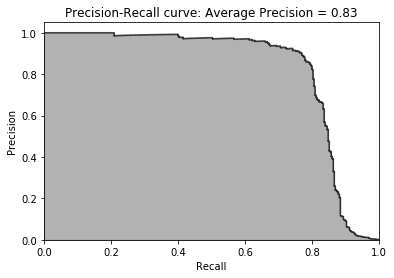

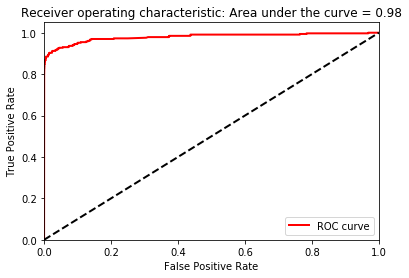

In [245]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [246]:
# The average precision is 0.82, the same as that of XGboost (0.82), better than that of random forests (0.79), and
# considerably better than that of logistic regression (0.73).

# The auROC curve is 0.98, an improvement over that of XGBoost (0.97), logistic regression (0.97), and random forests (0.93).


# Evaluation of the Four Models Using the Test Set

In [247]:
# So far in this chapter, we have learned how to:

    # 1:- Set up the environment for machine learning projects
    # 2:- Acquire, load, explore, clean, and visualize data
    # 3:- Split the dataset into training and test sets and set up k-fold crossvalidation sets
    # 4:- Choose the appropriate cost function
    # 5:- Set the hyperparameters and perform training and cross-validation
    # 6:- Evaluate the results

# We have not explored how to adjust the hyperparameters (a process known as hyperparameter fine-tuning) to improve
# the results of each machine learning solution and address underfitting/overfitting,


'''
Even without such fine-tuning, the results are pretty clear. Based on our training and k-fold cross-validation,
LightGBM gradient boosting is the best solution, closely followed by XGBoost. Random forests and logistic regression
are worse.
'''

'\nEven without such fine-tuning, the results are pretty clear. Based on our training and k-fold cross-validation,\nLightGBM gradient boosting is the best solution, closely followed by XGBoost. Random forests and logistic regression\nare worse.\n'

In [248]:
# Let’s use the test set as a final evaluation of each of the four models:

'''For each model, we will use the trained model to predict the fraud
probabilities for the test set transactions. Then, we will calculate the log
loss for each model by comparing the fraud probabilities predicted by the
model against the true fraud labels:'''

'For each model, we will use the trained model to predict the fraud\nprobabilities for the test set transactions. Then, we will calculate the log\nloss for each model by comparing the fraud probabilities predicted by the\nmodel against the true fraud labels:'

In [250]:
predictionsTestSetLogisticRegression = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = log_loss(y_test, predictionsTestSetLogisticRegression)

In [251]:
predictionsTestSetRandomForests = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = log_loss(y_test, predictionsTestSetRandomForests)

In [252]:
predictionsTestSetXGBoostGradientBoosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [253]:
predictionsTestSetLightGBMGradientBoosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [254]:

print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.1237329613131888
Log Loss of Random Forests on Test Set:  0.009181927576739956
Log Loss of XGBoost Gradient Boosting on Test Set:  0.0024911680792237684
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002563389596145862


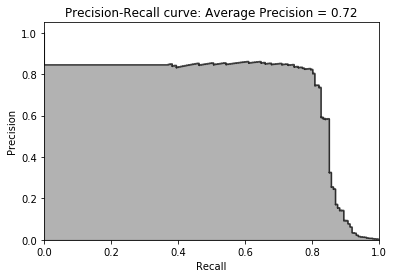

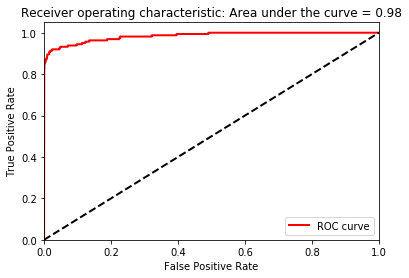

In [256]:
# Test set precision-recall and auROC curve of logistic regression:

precision, recall, thresholds = precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

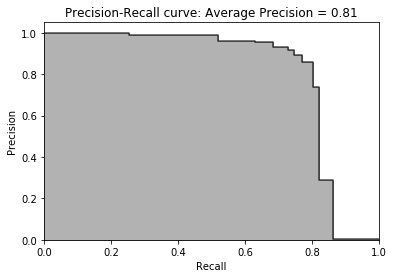

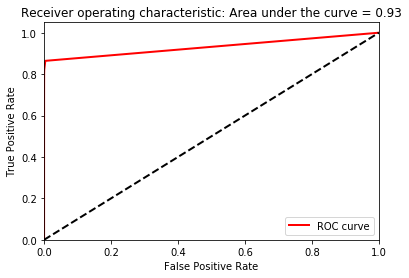

In [257]:
# Test set precision-recall and auROC curve of Random Forests:

precision, recall, thresholds = precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

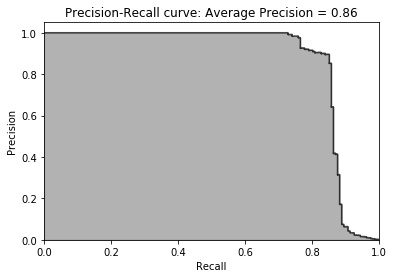

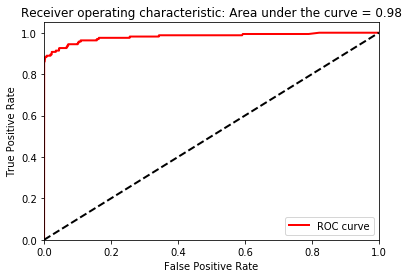

In [258]:
# Test set precision-recall and auROC curve of XGBoost gradient boosting:

precision, recall, thresholds = precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

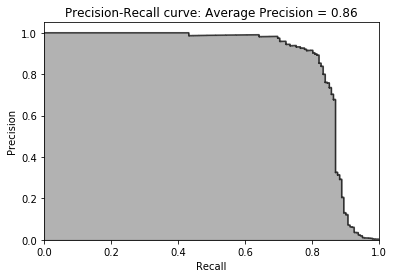

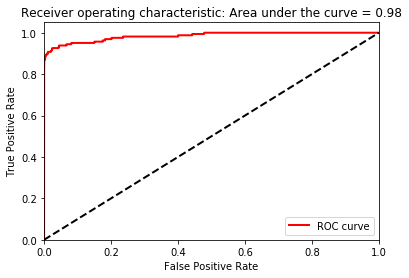

In [259]:
# Test set precision-recall and auROC curve of LightGBM gradient boosting:

precision, recall, thresholds = precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [260]:
# The results of LightGBM gradient boosting are impressive—we can catch over 80% of the fraudulent transactions with
# nearly 90% precision (in other words, in catching 80% of the total fraud the LightGBM model gets only 10% of the
#                       cases wrong). Considering how few cases of fraud our dataset has, this is a great accomplishment.

# Ensembles

In [ ]:
# Instead of picking just one of the machine learning solutions we have developed for use in production, we cac
# evaluate whether an ensemble of the models leads to an improved fraud detection rate.

'''
Generally, if we include similarly strong solutions from different machine learning families (such as one from
random forests and one from neural networks), the ensemble of the solutions will lead to a better result than any
of the standalone solutions. This is because each of the standalone solutions has different strengths and weaknesses.
'''

# Stacking

In [262]:
'''
In our problem here, two of the models (LightGBM gradient boosting and
XGBoost gradient boosting) are much stronger than the others (random
forests and logistic regression). But the two strongest models are from the
same family, which means their strengths and weaknesses will be highly
correlated.
'''
# We can use stacking (which is a form of ensembling) to determine whether we can get an improvement in performance
# compared to the standalone models from earlier.

# SEE IN BOOK for More Detail.

'\nIn our problem here, two of the models (LightGBM gradient boosting and\nXGBoost gradient boosting) are much stronger than the others (random\nforests and logistic regression). But the two strongest models are from the\nsame family, which means their strengths and weaknesses will be highly\ncorrelated.\n'

### Combine layer one predictions with the original training dataset

In [265]:


predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'].astype(float),how='left',rsuffix="2").join(predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), how='left',rsuffix="3").join(predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = ['predsLR','predsRF','predsXGB','predsLightGBM']
X_trainWithPredictions = X_train.merge(predictionsBasedOnKFoldsFourModels,
left_index=True,right_index=True)

In [266]:
# Set the hyperparameters:
'''
Now we will use LightGBM gradient boosting—the best machine learning algorithm from the earlier exercise—to train
on this original features plus layer one predictions dataset.
'''
params_lightGB = {
'task': 'train',
'application':'binary',
'num_class':1,
'boosting': 'gbdt',
'objective': 'binary',
'metric': 'binary_logloss',
'metric_freq':50,
'is_training_metric':False,
'max_depth':4,
'num_leaves': 31,
'learning_rate': 0.01,
'feature_fraction': 1.0,
'bagging_fraction': 1.0,
'bagging_freq': 0,
'bagging_seed': 2018,
'verbose': 0,
'num_threads':16
}

# Train the model:

In [267]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    
    X_train_fold, X_cv_fold = X_trainWithPredictions.iloc[train_index,:], X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
    valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[1]	valid_0's binary_logloss: 0.00622381
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00615192
[3]	valid_0's binary_logloss: 0.00608111
[4]	valid_0's binary_logloss: 0.00602241
[5]	valid_0's binary_logloss: 0.00596166
[6]	valid_0's binary_logloss: 0.0059004
[7]	valid_0's binary_logloss: 0.00584361
[8]	valid_0's binary_logloss: 0.00579644
[9]	valid_0's binary_logloss: 0.00574924
[10]	valid_0's binary_logloss: 0.00570917
[11]	valid_0's binary_logloss: 0.00566335
[12]	valid_0's binary_logloss: 0.0056242
[13]	valid_0's binary_logloss: 0.00558488
[14]	valid_0's binary_logloss: 0.00554761
[15]	valid_0's binary_logloss: 0.00551214
[16]	valid_0's binary_logloss: 0.00547469
[17]	valid_0's binary_logloss: 0.00544166
[18]	valid_0's binary_logloss: 0.0054097
[19]	valid_0's binary_logloss: 0.00537345
[20]	valid_0's binary_logloss: 0.00534442
[21]	valid_0's binary_logloss: 0.00531637
[22]	valid_0's binary_logloss: 0.0052869
[23]	valid_0's binary_loglo

[388]	valid_0's binary_logloss: 0.00383776
[389]	valid_0's binary_logloss: 0.00383913
[390]	valid_0's binary_logloss: 0.0038404
[391]	valid_0's binary_logloss: 0.0038404
[392]	valid_0's binary_logloss: 0.00384191
[393]	valid_0's binary_logloss: 0.00384254
[394]	valid_0's binary_logloss: 0.00384469
[395]	valid_0's binary_logloss: 0.00384585
[396]	valid_0's binary_logloss: 0.00384607
[397]	valid_0's binary_logloss: 0.00384679
[398]	valid_0's binary_logloss: 0.00384662
[399]	valid_0's binary_logloss: 0.00384864
[400]	valid_0's binary_logloss: 0.00384929
[401]	valid_0's binary_logloss: 0.0038506
[402]	valid_0's binary_logloss: 0.00385062
[403]	valid_0's binary_logloss: 0.00385056
[404]	valid_0's binary_logloss: 0.00385133
[405]	valid_0's binary_logloss: 0.00385145
[406]	valid_0's binary_logloss: 0.0038529
[407]	valid_0's binary_logloss: 0.00385369
[408]	valid_0's binary_logloss: 0.00385448
[409]	valid_0's binary_logloss: 0.00385434
[410]	valid_0's binary_logloss: 0.00385639
[411]	valid_0's

[131]	valid_0's binary_logloss: 0.00328534
[132]	valid_0's binary_logloss: 0.00328053
[133]	valid_0's binary_logloss: 0.00327536
[134]	valid_0's binary_logloss: 0.00327004
[135]	valid_0's binary_logloss: 0.00326555
[136]	valid_0's binary_logloss: 0.00326102
[137]	valid_0's binary_logloss: 0.00325668
[138]	valid_0's binary_logloss: 0.00325121
[139]	valid_0's binary_logloss: 0.00324562
[140]	valid_0's binary_logloss: 0.00324037
[141]	valid_0's binary_logloss: 0.00323472
[142]	valid_0's binary_logloss: 0.00323014
[143]	valid_0's binary_logloss: 0.00322497
[144]	valid_0's binary_logloss: 0.00322001
[145]	valid_0's binary_logloss: 0.00321505
[146]	valid_0's binary_logloss: 0.00321026
[147]	valid_0's binary_logloss: 0.00320512
[148]	valid_0's binary_logloss: 0.00319968
[149]	valid_0's binary_logloss: 0.00319402
[150]	valid_0's binary_logloss: 0.00318859
[151]	valid_0's binary_logloss: 0.00318327
[152]	valid_0's binary_logloss: 0.0031781
[153]	valid_0's binary_logloss: 0.00317371
[154]	valid_

[518]	valid_0's binary_logloss: 0.00287415
[519]	valid_0's binary_logloss: 0.00287379
[520]	valid_0's binary_logloss: 0.00287364
[521]	valid_0's binary_logloss: 0.00287342
[522]	valid_0's binary_logloss: 0.00287262
[523]	valid_0's binary_logloss: 0.00287331
[524]	valid_0's binary_logloss: 0.0028731
[525]	valid_0's binary_logloss: 0.00287402
[526]	valid_0's binary_logloss: 0.00287467
[527]	valid_0's binary_logloss: 0.00287446
[528]	valid_0's binary_logloss: 0.00287491
[529]	valid_0's binary_logloss: 0.00287454
[530]	valid_0's binary_logloss: 0.00287471
[531]	valid_0's binary_logloss: 0.00287517
[532]	valid_0's binary_logloss: 0.00287503
[533]	valid_0's binary_logloss: 0.00287558
[534]	valid_0's binary_logloss: 0.00287576
[535]	valid_0's binary_logloss: 0.00287647
[536]	valid_0's binary_logloss: 0.00287627
[537]	valid_0's binary_logloss: 0.0028762
[538]	valid_0's binary_logloss: 0.00287667
[539]	valid_0's binary_logloss: 0.00287686
[540]	valid_0's binary_logloss: 0.00287721
[541]	valid_0

[161]	valid_0's binary_logloss: 0.00382959
[162]	valid_0's binary_logloss: 0.00382791
[163]	valid_0's binary_logloss: 0.00382501
[164]	valid_0's binary_logloss: 0.00382407
[165]	valid_0's binary_logloss: 0.00382217
[166]	valid_0's binary_logloss: 0.00382043
[167]	valid_0's binary_logloss: 0.00381831
[168]	valid_0's binary_logloss: 0.00381602
[169]	valid_0's binary_logloss: 0.0038146
[170]	valid_0's binary_logloss: 0.00381352
[171]	valid_0's binary_logloss: 0.00381177
[172]	valid_0's binary_logloss: 0.00381014
[173]	valid_0's binary_logloss: 0.00380862
[174]	valid_0's binary_logloss: 0.00380704
[175]	valid_0's binary_logloss: 0.00380546
[176]	valid_0's binary_logloss: 0.00380315
[177]	valid_0's binary_logloss: 0.00380176
[178]	valid_0's binary_logloss: 0.00380045
[179]	valid_0's binary_logloss: 0.00379935
[180]	valid_0's binary_logloss: 0.0037973
[181]	valid_0's binary_logloss: 0.0037961
[182]	valid_0's binary_logloss: 0.00379475
[183]	valid_0's binary_logloss: 0.00379359
[184]	valid_0'

[358]	valid_0's binary_logloss: 0.00377409
[359]	valid_0's binary_logloss: 0.00377459
[360]	valid_0's binary_logloss: 0.00377523
[361]	valid_0's binary_logloss: 0.00377669
[362]	valid_0's binary_logloss: 0.00377677
[363]	valid_0's binary_logloss: 0.00377742
[364]	valid_0's binary_logloss: 0.00377813
[365]	valid_0's binary_logloss: 0.00377963
[366]	valid_0's binary_logloss: 0.00378049
[367]	valid_0's binary_logloss: 0.00378078
[368]	valid_0's binary_logloss: 0.00378226
[369]	valid_0's binary_logloss: 0.00378299
[370]	valid_0's binary_logloss: 0.00378419
[371]	valid_0's binary_logloss: 0.00378466
[372]	valid_0's binary_logloss: 0.00378553
[373]	valid_0's binary_logloss: 0.00378705
[374]	valid_0's binary_logloss: 0.00378781
[375]	valid_0's binary_logloss: 0.00378937
[376]	valid_0's binary_logloss: 0.00378973
[377]	valid_0's binary_logloss: 0.0037905
[378]	valid_0's binary_logloss: 0.00379174
[379]	valid_0's binary_logloss: 0.00379261
[380]	valid_0's binary_logloss: 0.00379416
[381]	valid_

[88]	valid_0's binary_logloss: 0.00301214
[89]	valid_0's binary_logloss: 0.00299904
[90]	valid_0's binary_logloss: 0.00298693
[91]	valid_0's binary_logloss: 0.00297425
[92]	valid_0's binary_logloss: 0.00296369
[93]	valid_0's binary_logloss: 0.00295217
[94]	valid_0's binary_logloss: 0.00294069
[95]	valid_0's binary_logloss: 0.00293034
[96]	valid_0's binary_logloss: 0.00292007
[97]	valid_0's binary_logloss: 0.00290954
[98]	valid_0's binary_logloss: 0.00289884
[99]	valid_0's binary_logloss: 0.00288822
[100]	valid_0's binary_logloss: 0.0028782
[101]	valid_0's binary_logloss: 0.0028678
[102]	valid_0's binary_logloss: 0.00285916
[103]	valid_0's binary_logloss: 0.00284903
[104]	valid_0's binary_logloss: 0.00283951
[105]	valid_0's binary_logloss: 0.00283016
[106]	valid_0's binary_logloss: 0.00282094
[107]	valid_0's binary_logloss: 0.002812
[108]	valid_0's binary_logloss: 0.002803
[109]	valid_0's binary_logloss: 0.00279431
[110]	valid_0's binary_logloss: 0.00278577
[111]	valid_0's binary_loglos

[290]	valid_0's binary_logloss: 0.00212337
[291]	valid_0's binary_logloss: 0.00212019
[292]	valid_0's binary_logloss: 0.00211774
[293]	valid_0's binary_logloss: 0.00211674
[294]	valid_0's binary_logloss: 0.00211567
[295]	valid_0's binary_logloss: 0.00211331
[296]	valid_0's binary_logloss: 0.00211247
[297]	valid_0's binary_logloss: 0.0021111
[298]	valid_0's binary_logloss: 0.0021101
[299]	valid_0's binary_logloss: 0.00210943
[300]	valid_0's binary_logloss: 0.00210707
[301]	valid_0's binary_logloss: 0.00210641
[302]	valid_0's binary_logloss: 0.0021055
[303]	valid_0's binary_logloss: 0.00210273
[304]	valid_0's binary_logloss: 0.00210205
[305]	valid_0's binary_logloss: 0.00210109
[306]	valid_0's binary_logloss: 0.00209864
[307]	valid_0's binary_logloss: 0.00209652
[308]	valid_0's binary_logloss: 0.00209588
[309]	valid_0's binary_logloss: 0.00209349
[310]	valid_0's binary_logloss: 0.00209153
[311]	valid_0's binary_logloss: 0.00209076
[312]	valid_0's binary_logloss: 0.00209001
[313]	valid_0'

[489]	valid_0's binary_logloss: 0.00201872
[490]	valid_0's binary_logloss: 0.00201917
[491]	valid_0's binary_logloss: 0.0020188
[492]	valid_0's binary_logloss: 0.00201853
[493]	valid_0's binary_logloss: 0.00201857
[494]	valid_0's binary_logloss: 0.00201592
[495]	valid_0's binary_logloss: 0.00201564
[496]	valid_0's binary_logloss: 0.00201545
[497]	valid_0's binary_logloss: 0.0020152
[498]	valid_0's binary_logloss: 0.00201293
[499]	valid_0's binary_logloss: 0.00201346
[500]	valid_0's binary_logloss: 0.00201321
[501]	valid_0's binary_logloss: 0.00201287
[502]	valid_0's binary_logloss: 0.00201331
[503]	valid_0's binary_logloss: 0.00201304
[504]	valid_0's binary_logloss: 0.00201305
[505]	valid_0's binary_logloss: 0.00201281
[506]	valid_0's binary_logloss: 0.00201277
[507]	valid_0's binary_logloss: 0.00201056
[508]	valid_0's binary_logloss: 0.00201093
[509]	valid_0's binary_logloss: 0.00201065
[510]	valid_0's binary_logloss: 0.00200849
[511]	valid_0's binary_logloss: 0.00200836
[512]	valid_0

[685]	valid_0's binary_logloss: 0.00193992
[686]	valid_0's binary_logloss: 0.00193958
[687]	valid_0's binary_logloss: 0.00194001
[688]	valid_0's binary_logloss: 0.00193905
[689]	valid_0's binary_logloss: 0.00193894
[690]	valid_0's binary_logloss: 0.00193846
[691]	valid_0's binary_logloss: 0.00193876
[692]	valid_0's binary_logloss: 0.00193902
[693]	valid_0's binary_logloss: 0.00193927
[694]	valid_0's binary_logloss: 0.00193859
[695]	valid_0's binary_logloss: 0.00193837
[696]	valid_0's binary_logloss: 0.00193764
[697]	valid_0's binary_logloss: 0.00193718
[698]	valid_0's binary_logloss: 0.00193609
[699]	valid_0's binary_logloss: 0.00193564
[700]	valid_0's binary_logloss: 0.00193554
[701]	valid_0's binary_logloss: 0.00193524
[702]	valid_0's binary_logloss: 0.0019354
[703]	valid_0's binary_logloss: 0.0019349
[704]	valid_0's binary_logloss: 0.00193516
[705]	valid_0's binary_logloss: 0.00193516
[706]	valid_0's binary_logloss: 0.00193563
[707]	valid_0's binary_logloss: 0.00193519
[708]	valid_0

[889]	valid_0's binary_logloss: 0.00191968
[890]	valid_0's binary_logloss: 0.00191995
[891]	valid_0's binary_logloss: 0.0019201
[892]	valid_0's binary_logloss: 0.00191951
[893]	valid_0's binary_logloss: 0.00191898
[894]	valid_0's binary_logloss: 0.00191858
[895]	valid_0's binary_logloss: 0.00191884
[896]	valid_0's binary_logloss: 0.00191883
[897]	valid_0's binary_logloss: 0.00191872
[898]	valid_0's binary_logloss: 0.00191857
[899]	valid_0's binary_logloss: 0.00191849
[900]	valid_0's binary_logloss: 0.00191834
[901]	valid_0's binary_logloss: 0.00191875
[902]	valid_0's binary_logloss: 0.0019189
[903]	valid_0's binary_logloss: 0.00191953
[904]	valid_0's binary_logloss: 0.00191959
[905]	valid_0's binary_logloss: 0.00191982
[906]	valid_0's binary_logloss: 0.00191997
[907]	valid_0's binary_logloss: 0.00191984
[908]	valid_0's binary_logloss: 0.00191969
[909]	valid_0's binary_logloss: 0.00191997
[910]	valid_0's binary_logloss: 0.00191996
[911]	valid_0's binary_logloss: 0.00192015
[912]	valid_0

[84]	valid_0's binary_logloss: 0.00295263
[85]	valid_0's binary_logloss: 0.00293903
[86]	valid_0's binary_logloss: 0.00292583
[87]	valid_0's binary_logloss: 0.00291086
[88]	valid_0's binary_logloss: 0.00289862
[89]	valid_0's binary_logloss: 0.00288675
[90]	valid_0's binary_logloss: 0.00287402
[91]	valid_0's binary_logloss: 0.00286208
[92]	valid_0's binary_logloss: 0.00285015
[93]	valid_0's binary_logloss: 0.00283838
[94]	valid_0's binary_logloss: 0.00282657
[95]	valid_0's binary_logloss: 0.00281459
[96]	valid_0's binary_logloss: 0.00280297
[97]	valid_0's binary_logloss: 0.0027923
[98]	valid_0's binary_logloss: 0.00278149
[99]	valid_0's binary_logloss: 0.00276732
[100]	valid_0's binary_logloss: 0.00275604
[101]	valid_0's binary_logloss: 0.00274528
[102]	valid_0's binary_logloss: 0.0027355
[103]	valid_0's binary_logloss: 0.00272518
[104]	valid_0's binary_logloss: 0.0027119
[105]	valid_0's binary_logloss: 0.00270105
[106]	valid_0's binary_logloss: 0.00269199
[107]	valid_0's binary_logloss

[276]	valid_0's binary_logloss: 0.00191925
[277]	valid_0's binary_logloss: 0.00191773
[278]	valid_0's binary_logloss: 0.00191586
[279]	valid_0's binary_logloss: 0.0019134
[280]	valid_0's binary_logloss: 0.00191119
[281]	valid_0's binary_logloss: 0.00190853
[282]	valid_0's binary_logloss: 0.00190685
[283]	valid_0's binary_logloss: 0.00190536
[284]	valid_0's binary_logloss: 0.00190429
[285]	valid_0's binary_logloss: 0.00190265
[286]	valid_0's binary_logloss: 0.0019011
[287]	valid_0's binary_logloss: 0.00190003
[288]	valid_0's binary_logloss: 0.00189821
[289]	valid_0's binary_logloss: 0.00189678
[290]	valid_0's binary_logloss: 0.00189532
[291]	valid_0's binary_logloss: 0.00189319
[292]	valid_0's binary_logloss: 0.00189141
[293]	valid_0's binary_logloss: 0.00188979
[294]	valid_0's binary_logloss: 0.00188818
[295]	valid_0's binary_logloss: 0.00188685
[296]	valid_0's binary_logloss: 0.00188573
[297]	valid_0's binary_logloss: 0.00188383
[298]	valid_0's binary_logloss: 0.00188226
[299]	valid_0

[471]	valid_0's binary_logloss: 0.00174908
[472]	valid_0's binary_logloss: 0.00174855
[473]	valid_0's binary_logloss: 0.0017482
[474]	valid_0's binary_logloss: 0.0017484
[475]	valid_0's binary_logloss: 0.00174805
[476]	valid_0's binary_logloss: 0.00174811
[477]	valid_0's binary_logloss: 0.0017481
[478]	valid_0's binary_logloss: 0.00174769
[479]	valid_0's binary_logloss: 0.0017476
[480]	valid_0's binary_logloss: 0.00174789
[481]	valid_0's binary_logloss: 0.00174774
[482]	valid_0's binary_logloss: 0.00174786
[483]	valid_0's binary_logloss: 0.00174746
[484]	valid_0's binary_logloss: 0.00174718
[485]	valid_0's binary_logloss: 0.00174684
[486]	valid_0's binary_logloss: 0.00174698
[487]	valid_0's binary_logloss: 0.00174636
[488]	valid_0's binary_logloss: 0.00174653
[489]	valid_0's binary_logloss: 0.00174619
[490]	valid_0's binary_logloss: 0.00174629
[491]	valid_0's binary_logloss: 0.00174673
[492]	valid_0's binary_logloss: 0.00174605
[493]	valid_0's binary_logloss: 0.00174572
[494]	valid_0's

[671]	valid_0's binary_logloss: 0.00172665
[672]	valid_0's binary_logloss: 0.00172673
[673]	valid_0's binary_logloss: 0.00172755
[674]	valid_0's binary_logloss: 0.00172764
[675]	valid_0's binary_logloss: 0.0017264
[676]	valid_0's binary_logloss: 0.00172562
[677]	valid_0's binary_logloss: 0.00172541
[678]	valid_0's binary_logloss: 0.00172469
[679]	valid_0's binary_logloss: 0.00172365
[680]	valid_0's binary_logloss: 0.00172364
[681]	valid_0's binary_logloss: 0.00172262
[682]	valid_0's binary_logloss: 0.00172166
[683]	valid_0's binary_logloss: 0.00172175
[684]	valid_0's binary_logloss: 0.00172256
[685]	valid_0's binary_logloss: 0.00172266
[686]	valid_0's binary_logloss: 0.00172264
[687]	valid_0's binary_logloss: 0.00172173
[688]	valid_0's binary_logloss: 0.00172172
[689]	valid_0's binary_logloss: 0.00172106
[690]	valid_0's binary_logloss: 0.00171986
[691]	valid_0's binary_logloss: 0.00171966
[692]	valid_0's binary_logloss: 0.00172079
[693]	valid_0's binary_logloss: 0.0017205
[694]	valid_0

[870]	valid_0's binary_logloss: 0.00172395
[871]	valid_0's binary_logloss: 0.00172451
[872]	valid_0's binary_logloss: 0.00172465
[873]	valid_0's binary_logloss: 0.00172502
[874]	valid_0's binary_logloss: 0.00172497
[875]	valid_0's binary_logloss: 0.00172488
[876]	valid_0's binary_logloss: 0.00172461
[877]	valid_0's binary_logloss: 0.00172465
[878]	valid_0's binary_logloss: 0.00172482
[879]	valid_0's binary_logloss: 0.00172502
[880]	valid_0's binary_logloss: 0.0017252
[881]	valid_0's binary_logloss: 0.00172516
[882]	valid_0's binary_logloss: 0.00172548
[883]	valid_0's binary_logloss: 0.00172598
[884]	valid_0's binary_logloss: 0.00172662
[885]	valid_0's binary_logloss: 0.00172662
[886]	valid_0's binary_logloss: 0.00172683
[887]	valid_0's binary_logloss: 0.00172752
[888]	valid_0's binary_logloss: 0.00172762
[889]	valid_0's binary_logloss: 0.00172747
[890]	valid_0's binary_logloss: 0.00172746
[891]	valid_0's binary_logloss: 0.00172784
[892]	valid_0's binary_logloss: 0.0017278
[893]	valid_0

In [268]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [242, 243, 152, 452, 475, 163, 316, 299, 215, 213, 353, 284, 448, 189, 454, 364, 294, 264, 216, 408, 188, 169, 313, 192, 423, 206, 466, 178, 232, 633, 272, 250, 436, 975]


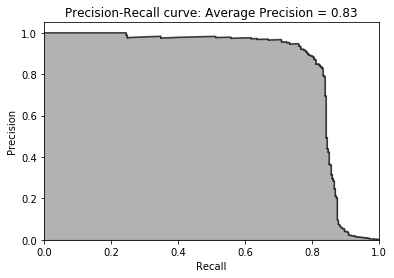

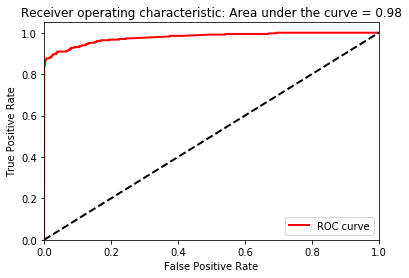

In [269]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

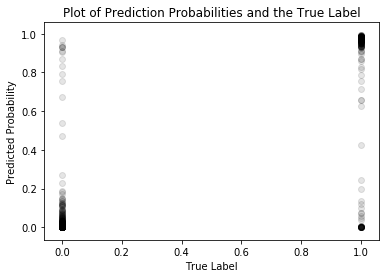

In [270]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

# Final Model Selection

In [ ]:
'''
Since the ensemble does not improve performance, we favor the simplicity of the standalone LightGBM gradient
boosting model and will use it in production.
'''
'''
Before we create a pipeline for new, incoming transactions, let’s visualize how well the LightGBM model separates the
fraudulent transactions from the normal transactions for the test set.
'''
'''
Based on this plot, the model does a reasonably good job of assigning a high probability of fraud to the transactions
that are actually fraudulent. Vice versa, the model generally assigns a low probability to the transactions that are not
fraudulent. Occasionally, the model is wrong, and assigns a low probability to a case of actual fraud and a high
probability to a case of not fraud.
'''

# Overall, the results are pretty impressive.

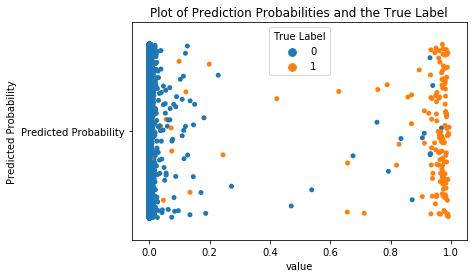

In [271]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

# Production Pipeline

In [272]:
'''Pipeline for New Data'''
# first, import new data into a dataframe called 'newData'
# second, scale data
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# third, predict using LightGBM
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'Pipeline for New Data'